<a href="https://colab.research.google.com/github/kiplangat-david/Intelligent-Forecasting-Challenge/blob/main/Capstone_Project_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

The Main goal of this project is  to therefore build  a model that  predicts consumption for 11 contraceptives across 156 health service delivery sites in the public sector health system in Côte d’Ivoire. The predictions are to be made monthly from October to December 2019.

### b) Defining the Metric for Success
Our project will be considered a success if we're able to develop a model with the lowest  RMSE.

### c) Understanding the context 
Contraceptive utilization is the practice that helps individuals or couples avoid unwanted pregnancy. Beyond preventing unwanted pregnancy, contraceptive access is vital to safe motherhood and prosperous communities.  
It is important that contraceptives are widely available and easily accessible to anyone who is sexually active. According to the UN Contraceptive use by method 2019 Data Booklet  Africa has by far the lowest percentage of women using contraceptives. To be specific, 214 million women of reproductive age in developing regions have an unmet need for contraception. 

One of the main reasons for limited access is that health systems in these countries are unable to predict the quantity of contracept
and family planning. When too much product is ordered, unused contraceptives are wasted and left to expire. 
Accurate forecasting of contraceptive consumption can save lives, money, and time by ensuring health service delivery sites have what they need when they need it and by reducing waste in the supply chain.

### d) Recording the Experimental Design
1. Data Preparation
 - Loading Dependencies
 - Loading the Dataset
 - Dealing with Irrelevant Observations
 - Handling missing/duplicate values
 - Data Uniformity
 - Checking Outliers
3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis
4. Modelling
 - Feature Engineering
 - Instantiating the Classifiers
 - Performance evaluation
 - Hyperparameter optimization
5. Performance Analysis
 - Assessing scores
6. Conclusions and Recommendations

### e) Data Relevance

Train Dataset is our main dataset.

Description of the variables in the primary dataset are as follows:

*  **Year**: year of the observation
*  **Month**: month of the observation
*  **Region**: higher level geographical area within Côte d'Ivoire
*  **District**: lower level geographical area within Côte d'Ivoire
*  **Site_code**: actual health service delivery site
*  **Product_code**: unique identifier for each commodity
*  **Stock_initial**: stock in hand of previous period. This is quantified in dispensing units
*  **Stock_received**: total quantity received in the last period. This is quantified in dispensing units
*  **Stock_distributed**{Target Variable}: quantity dispensed/consumed in the last reporting period. This is quantified in dispensing units
*  **Stock_adjustment**: all kinds of losses/ adjustments made at the facility
*  **Stock_end**: current physical count of stock in hand. This is quantified in dispensing units
*  **Average_monthly_consumption**: average monthly consumption for the last three months. This is quantified in dispensing units
*  **Stock_stockout_days**: total number of days facility was out of stock
*  **Stock_ordered**: the requested quantity. This is quantified in dispensing units.

## 2. Reading the Data

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the Datasets from the source i.e. csv
train = pd.read_csv('Train.csv')
annual_data = pd.read_csv('annual_cases.csv')
mon_data = pd.read_csv('monthly_cases.csv')
prod_data = pd.read_csv('product.csv')
serv_data = pd.read_csv('service_delivery_site_data.csv')



## 3. Checking the Data

#### Train Dataset

In [ ]:
# Determining the no. of records in our dataset(Train_data)
#
train.shape

(35753, 14)

In [ ]:
#Previewing train dataset 
train.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [ ]:
#Previewing service delivery site dataset 
serv_data.head()

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [ ]:
train.duplicated().sum()

0

In [ ]:
#Previewing product dataset 
prod_data.head()

,product_code,product_type,product_name
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE


In [ ]:
#Previewing monthly_cases dataset 
mon_data.head()

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,34.0,NaN,NaN,NaN,75.0,44.0,1082.0,2542.0,NaN,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,19.0,9.0,1.0,1.0,66.0,38.0,813.0,557.0,20.0,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,26.0,NaN,5.0,5.0,47.0,42.0,819.0,665.0,50.0,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,35.0,NaN,3.0,1.0,36.0,66.0,874.0,404.0,45.0,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,24.0,NaN,1.0,1.0,71.0,47.0,813.0,545.0,14.0,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0


In [ ]:
#Previewing annual cases dataset 
annual_data.head()

,Unnamed: 0,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,117.0,15.0,26.0,823.0,3681.0,7082.0,6893.0,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,34.0,22.0,15.0,483.0,2894.0,6460.0,6339.0,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,20.0,24.0,19.0,438.0,3167.0,5394.0,5982.0,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,383.0,180.0,155.0,2372.0,878.0,9512.0,5234.0,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,147.0,259.0,258.0,3066.0,1805.0,8939.0,6957.0,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [ ]:
#Merging Product file, Service delivery site data with The train dataset
train = train.merge(serv_data[['site_code','site_type','site_latitude','site_longitude']],on='site_code')
train = train.merge(prod_data[['product_code','product_type','product_name']],on='product_code')

In [ ]:
#Dropping column with null values 
train.drop(['stock_stockout_days'],axis=1,inplace=True)

In [ ]:
# Checking whether each column has an appropriate datatype after merging 
#
train.dtypes

year                             int64
month                            int64
region                          object
district                        object
site_code                       object
product_code                    object
stock_initial                    int64
stock_received                   int64
stock_distributed                int64
stock_adjustment                 int64
stock_end                        int64
average_monthly_consumption      int64
stock_ordered                  float64
site_type                       object
site_latitude                  float64
site_longitude                 float64
product_type                    object
product_name                    object
dtype: object

In [ ]:
#Merging year and month,then convert to datatime data type
train['date'] = train['year'].astype(str) + '-' + train['month'].astype(str)

train['date'] = pd.to_datetime(train['date'],yearfirst=True)
train = train.set_index('date')
train.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_type,site_latitude,site_longitude,product_type,product_name
date,,,,,,,,,,,,,,,,,,
2019-01-01,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,100.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2019-02-01,2019,2,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,0,0,0,0,18,100.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2019-03-01,2019,3,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,100,0,0,100,7,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2019-04-01,2019,4,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,100,0,2,0,98,1,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2019-05-01,2019,5,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,98,0,31,0,67,11,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE


In [ ]:
#Checking for duplicates 
train.duplicated().sum()

0

In [ ]:
#Checking for missing values 
train.isnull().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_ordered                  763
site_type                        0
site_latitude                    0
site_longitude                   0
product_type                     0
product_name                     0
dtype: int64

In [ ]:
#Dealing with missing values 
# Dropping all rhe rows with missing values 
train.dropna(inplace= True)

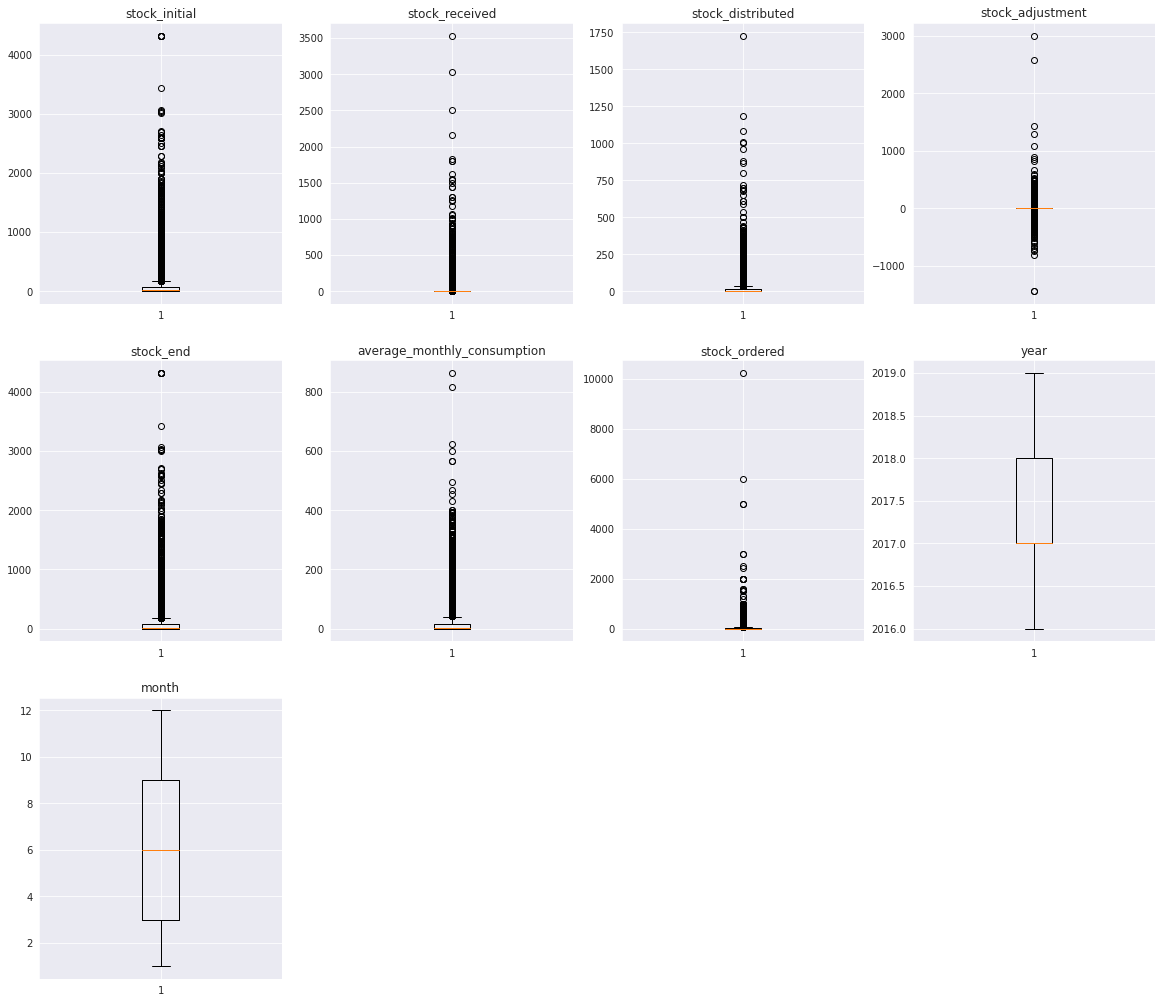

In [ ]:
#Checking for outliers 
Train_Numerics = {'stock_initial': 1, 'stock_received': 2, 'stock_distributed': 3,'stock_adjustment': 4,
              'stock_end': 5, 'average_monthly_consumption': 6,
              'stock_ordered': 7, 'year':8 ,'month':9}

plt.figure(figsize=(20,30))

#Visualizing the Information on a boxplot:
for variable,i in Train_Numerics.items():
  plt.subplot(5,4,i)
  plt.boxplot(train[variable])
  plt.title(variable)
plt.show()

Our dataset has outliers but after further investigations we realised they are true observations 

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Exploratory Analysis

### Univeriate Analysis

In [ ]:
#Duplicating train dataframe
train_eda = train

In [ ]:
#train_eda['product_code'] = train_eda['product_code'].replace({'AS27134': 'Injectable Contraceptive(NORISTERAT)', 'AS17005': 'Female Condom', 'AS46000': 'Male Condom', 'AS27139': 'Emergency Contraceptive (Pill)', 'AS27137': 'Contraceptive Implant(JADELLE)', 'AS27138': 'Contraceptive Implant(IMPLANON)', 'AS21126': 'Injectable Contraceptive(MEDROXYPROGESTERONE)', 'AS27133': 'Injectable Contraceptive(DEPO PROVERA)', 'AS42018': 'Intrauterine Device (IUD)', 'AS27000': 'Oral Contraceptive Pill(MICROGYNON)', 'AS27132': 'Oral Contraceptive Pill(MICROLUT)'})

In [ ]:
#Statistical summary 
train_eda.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_latitude,site_longitude
count,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000
mean,2017.444098,6.157073,63.360789,14.958131,14.892112,0.975336,64.402143,14.722006,26.658102,6.544934,-5.002917
std,1.020275,3.433967,169.464370,71.062948,40.092218,38.135708,171.681322,32.724458,107.166082,1.409089,1.321300
min,2016.000000,1.000000,0.000000,0.000000,0.000000,-1440.000000,0.000000,0.000000,0.000000,4.410880,-8.412813
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.352146,-6.047720
50%,2017.000000,6.000000,12.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.000000,6.187810,-4.573300
75%,2018.000000,9.000000,69.000000,0.000000,13.000000,0.000000,70.000000,16.000000,20.000000,7.387150,-3.990899
max,2019.000000,12.000000,4320.000000,3534.000000,1728.000000,3003.000000,4320.000000,864.000000,10240.000000,10.495000,-2.798370


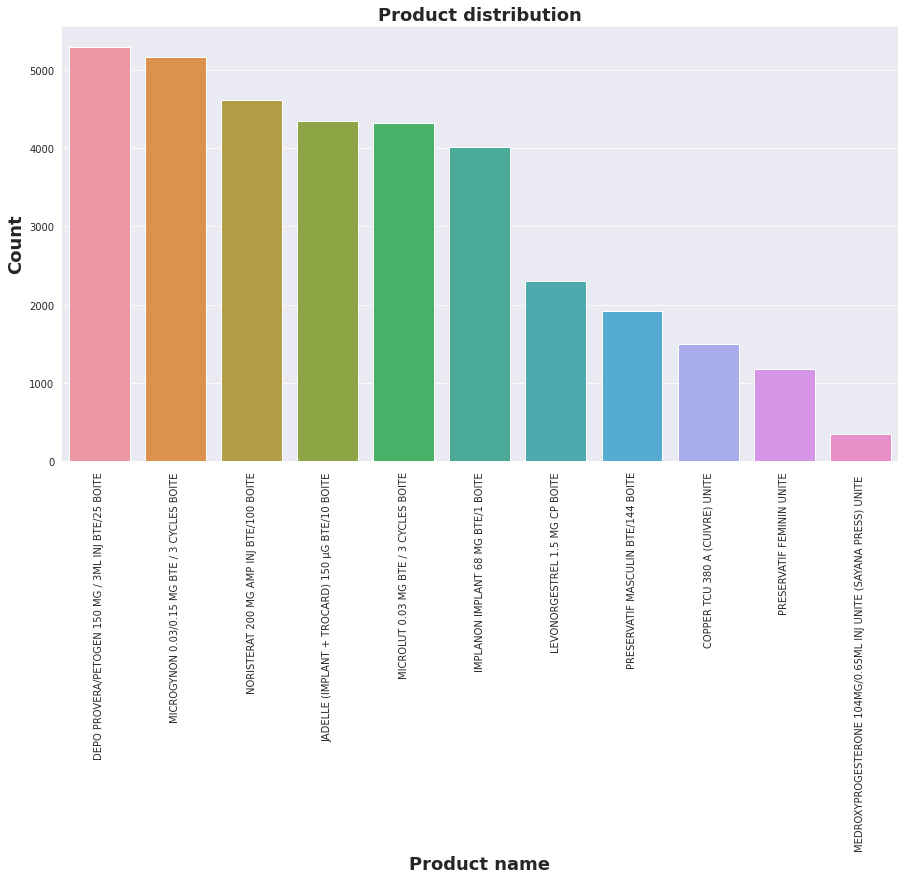

In [ ]:
#Plotting Products distribution
fontsize = 18
plt.figure(figsize=(15,8))
sns.countplot(train_eda['product_name'],data= train_eda, order = train_eda['product_name'].value_counts().index)
plt.title('Product distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Product name',weight='bold',fontsize= fontsize)
plt.ylabel('Count',weight='bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

 * The most popular contraceptive is Injectable   Contraceptive(DEPO PROVERA 150mg) followed by Oral Contraceptive Pill(MICROGYNON)

 * The least popular contraceptive is Injectable Contraceptive(MEDROXYPROGESTERONE 104mg)


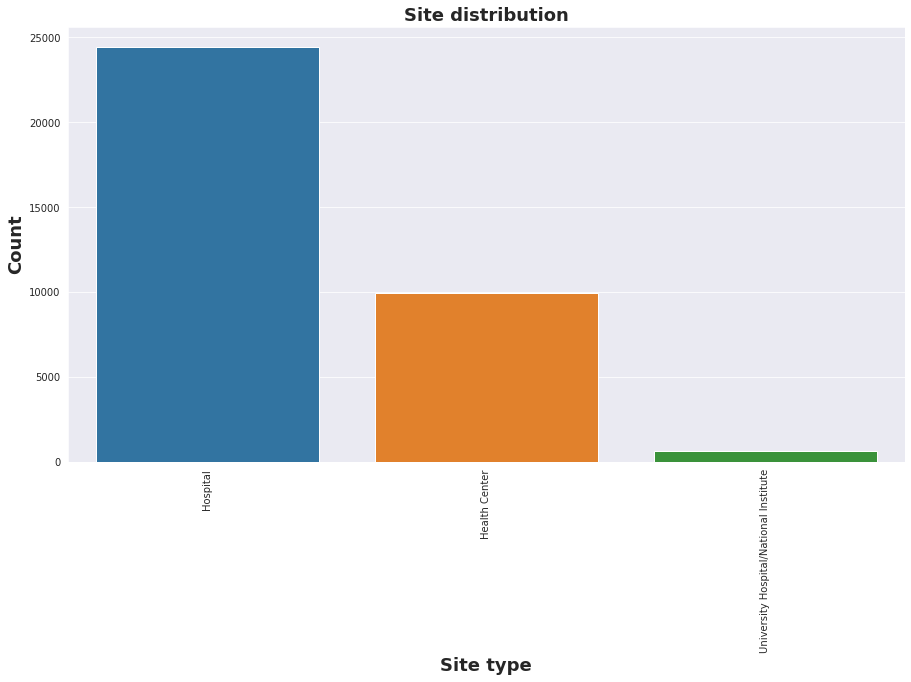

In [ ]:
#Plotting site ditribution 
fontsize = 18
plt.figure(figsize=(15,8))
sns.countplot(train_eda['site_type'],data= train_eda, order = train_eda['site_type'].value_counts().index)
plt.title('Site distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Site type',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count',weight='bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

The most visited site for contraceptives is the hospital 

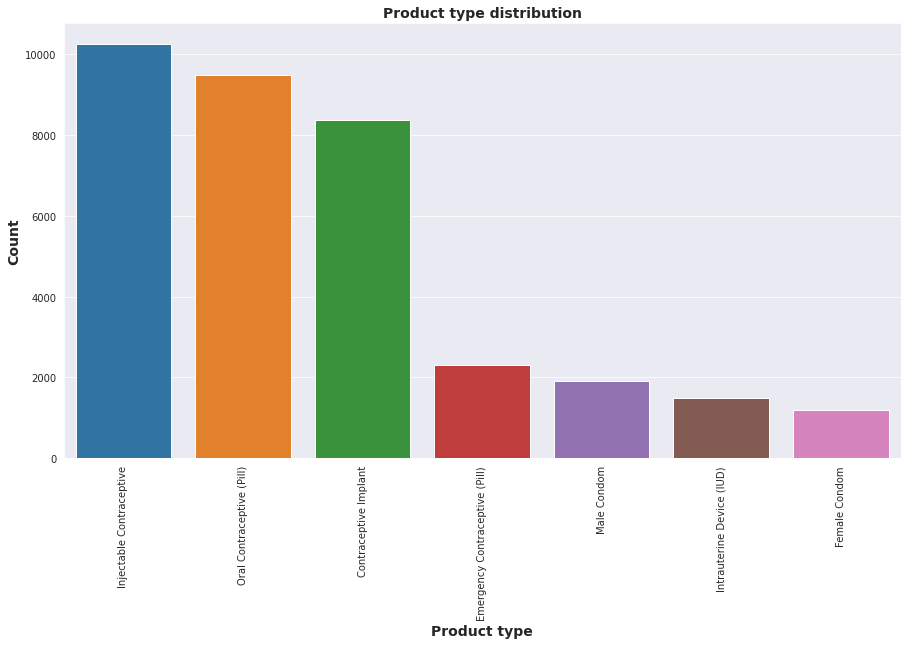

In [ ]:
#Product type distribution 
fontsize = 14
plt.figure(figsize=(15,8))
sns.countplot(train_eda['product_type'],data= train_eda, order = train_eda['product_type'].value_counts().index)
plt.title('Product type distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Product type',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count', weight = 'bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

The most prefered form of contraceptive is injectable contraceptive and the least prefered is female condom

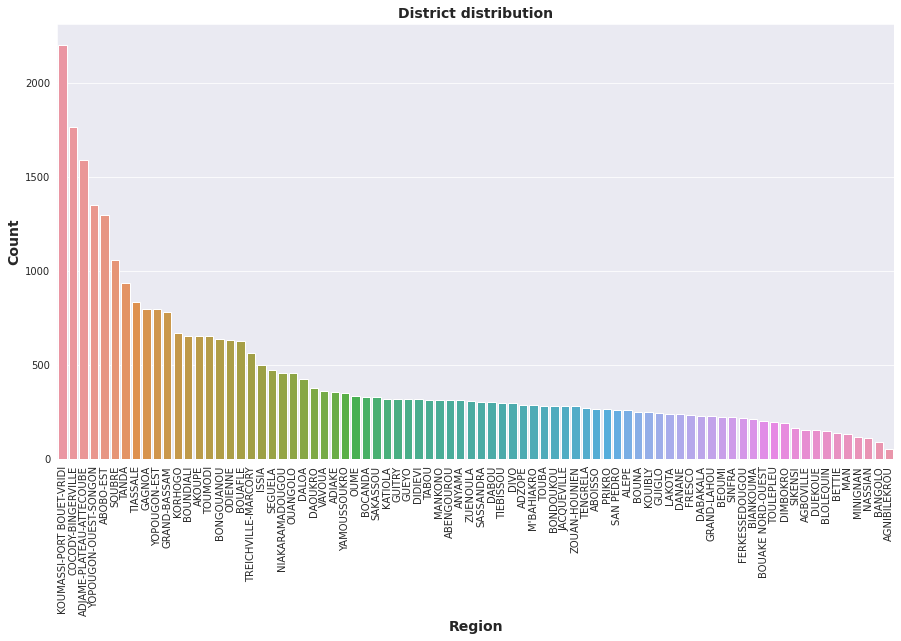

In [ ]:
#Plotting district ditribution 
fontsize = 14
plt.figure(figsize=(15,8))
sns.countplot(train_eda['district'],data= train_eda, order = train_eda['district'].value_counts().index)
plt.title('District distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Region',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count', weight = 'bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

Koumassi-port bouet is the district that has the highest number of people using contraceptive.

Bangolo is the district that has the least number of people using contraceptive.

### Bivariate Analysis

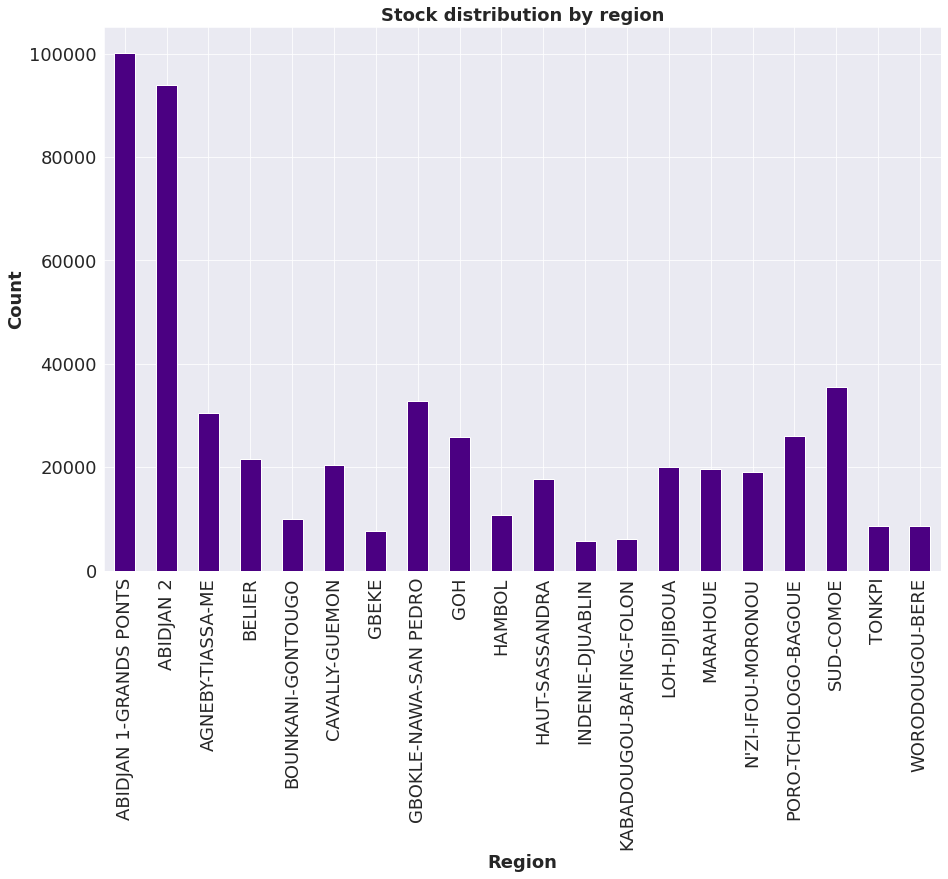

In [ ]:
#Plotting stock distribution by region
fontsize = 18
region = train.groupby('region')['stock_distributed'].sum()
region.plot(kind='bar', figsize=(15,10), color="indigo", fontsize= fontsize);
plt.title('Stock distribution by region' ,weight ='bold',fontsize= fontsize)
plt.xlabel('Region' ,weight='bold',fontsize= fontsize)
plt.ylabel('Count', weight= 'bold',fontsize= fontsize)
plt.show()

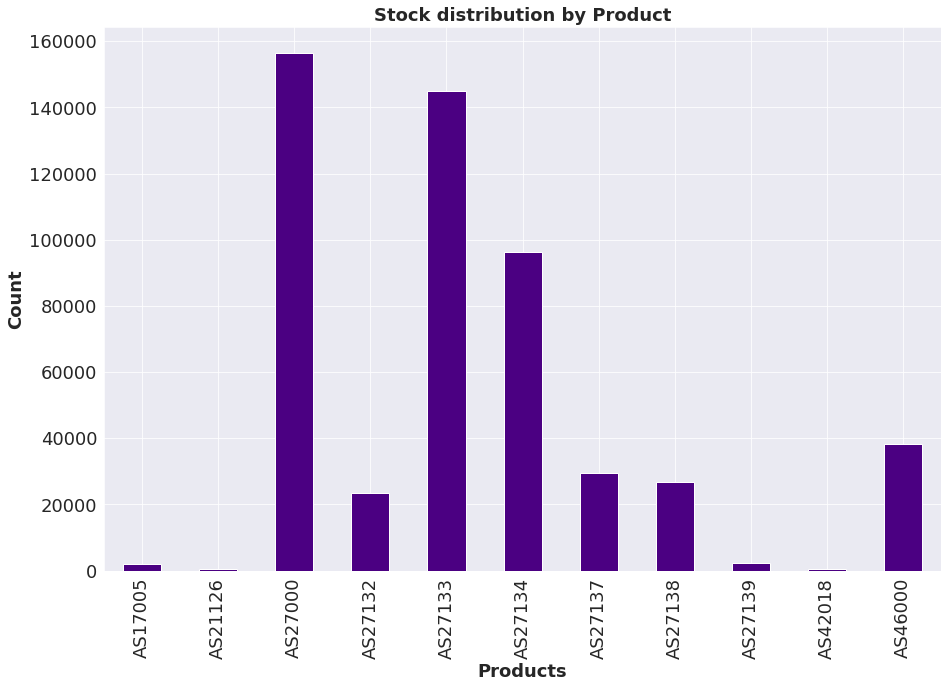

In [ ]:
#Plotting stock distribution by product code
fontsize = 18
region = train.groupby('product_code')['stock_distributed'].sum()
region.plot(kind='bar', figsize=(15,10), color="indigo", fontsize= fontsize);
plt.title('Stock distribution by Product' ,weight ='bold',fontsize= fontsize)
plt.xlabel('Products' ,weight='bold',fontsize= fontsize)
plt.ylabel('Count', weight= 'bold',fontsize= fontsize)
plt.show()

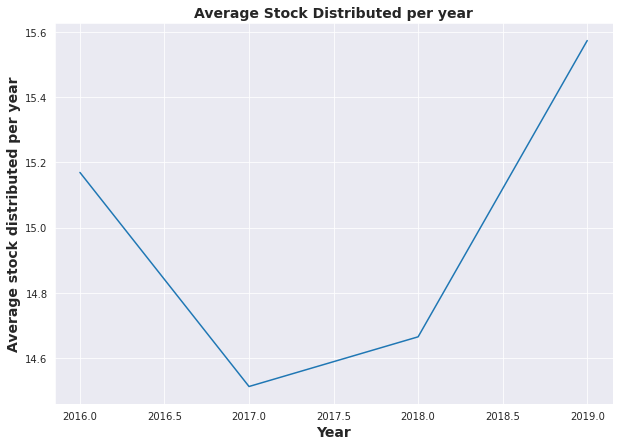

In [ ]:
#Plotting stock ditribution per year 
plt.figure(figsize=(10,7))
fontsize = 14
g = train_eda.groupby('year')['stock_distributed'].mean().reset_index(name = 'average stock distributed per year')
sns.lineplot(x = 'year', data = g, y='average stock distributed per year')
plt.title('Average Stock Distributed per year',weight ='bold',fontsize= fontsize)
plt.xlabel('Year',weight ='bold',fontsize= fontsize)
plt.ylabel('Average stock distributed per year',weight ='bold',fontsize= fontsize)
plt.show() 

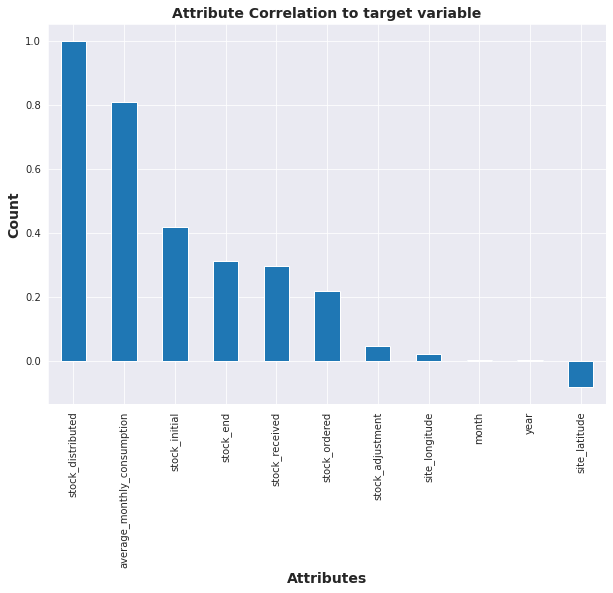

In [ ]:
#plotting attribute correlation to traget variable
fontsize = 14
figsize = [10,7]
correlation = train_eda.corr()
correlation['stock_distributed'].sort_values(ascending=False).plot(kind='bar',figsize=figsize)
plt.title('Attribute Correlation to target variable', weight ='bold',fontsize= fontsize)
plt.xlabel('Attributes',weight ='bold',fontsize= fontsize)
plt.ylabel('Count',weight ='bold',fontsize= fontsize)
plt.show()

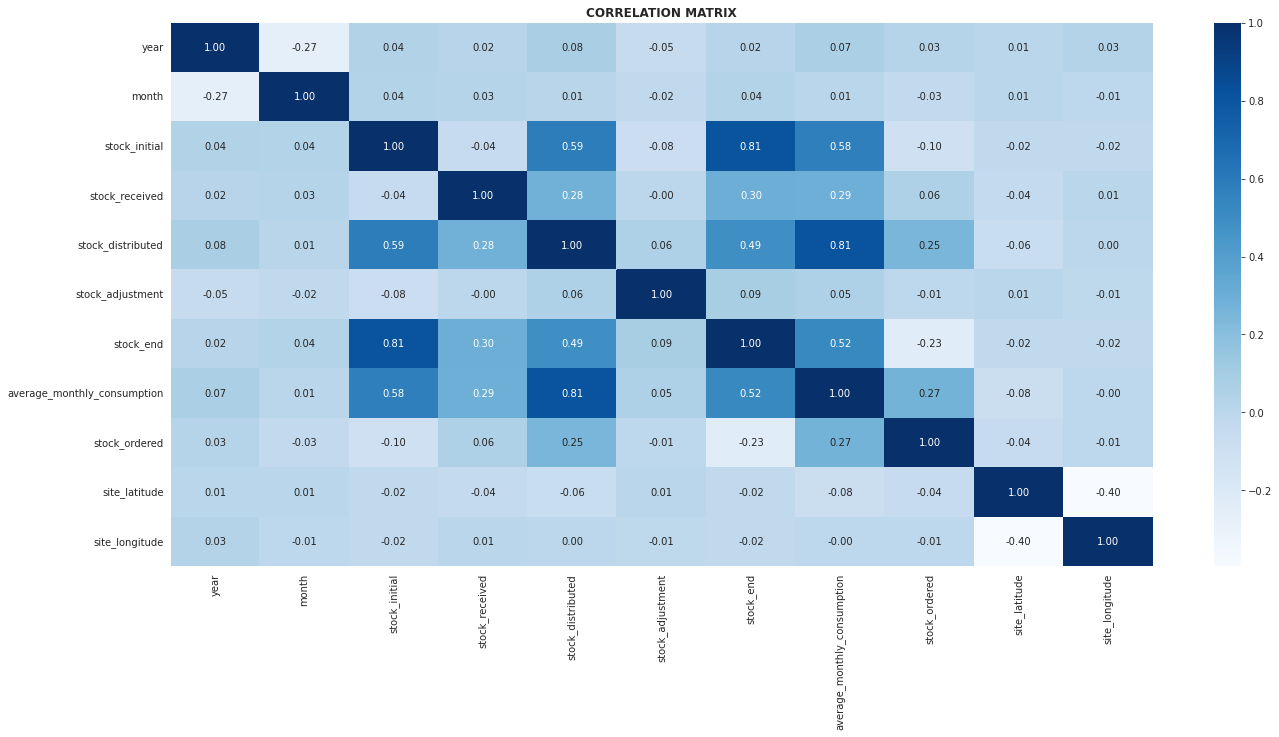

In [ ]:
#To check for correlation between the variables:
plt.figure(figsize = (22, 10))
corr = train_eda.corr(method = 'spearman')
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt=".2f")
plt.title('CORRELATION MATRIX', y=1.5,weight='bold')
plt.show()

### Multivariate Analysis

In [ ]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder 
en = LabelEncoder()
train['product_code'] = en.fit_transform(train['product_code'])
train['site_code'] = en.fit_transform(train['site_code'])

In [ ]:
#Dropping unnecessary columns
train.drop(['district','region','site_type','site_latitude','site_longitude','product_type','product_name'],axis=1,inplace=True)

In [ ]:
train.head(1)

,year,month,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered
date,,,,,,,,,,,
2019-01-01,2019,1,119,5,75,0,21,-54,0,18,100.0


[0.01489976 0.02039614 0.02755443 0.03380735 0.14038002 0.03895584
 0.01618017 0.06453293 0.61233062 0.03096274]


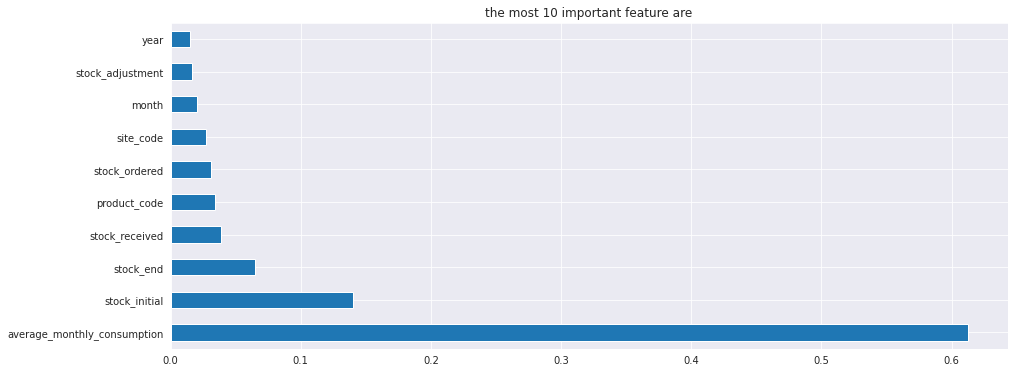

In [ ]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

X = train.drop('stock_distributed', axis=1)
y = train['stock_distributed']

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('the most 10 important feature are')
plt.show()

###Feature selection
### Using Lasso Regression

In [ ]:
#Spliting traget and feature variables
X = train.drop('stock_distributed', axis=1)
y = train['stock_distributed']

In [ ]:
#Importling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#split train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Hyperparameter tuing of lasso using pipeline 
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


In [ ]:
#Cross validation using Gridsearch CV
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,1,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .................model__alpha=0.1;, score=-7.361 total time=   0.2s
[CV 2/5] END .................model__alpha=0.1;, score=-2.690 total time=   0.1s
[CV 3/5] END .................model__alpha=0.1;, score=-2.157 total time=   0.2s
[CV 4/5] END .................model__alpha=0.1;, score=-1.813 total time=   0.2s
[CV 5/5] END .................model__alpha=0.1;, score=-3.720 total time=   0.2s
[CV 1/5] END ................model__alpha=0.2;, score=-29.371 total time=   0.2s
[CV 2/5] END ................model__alpha=0.2;, score=-10.728 total time=   0.2s
[CV 3/5] END .................model__alpha=0.2;, score=-8.603 total time=   0.1s
[CV 4/5] END .................model__alpha=0.2;, score=-7.231 total time=   0.1s
[CV 5/5] END ................model__alpha=0.2;, score=-14.839 total time=   0.2s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-66.033 total time=   0.2s
[CV 2/5] END model__alpha=0.30000000000000004;, s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
#Getting best α parameter
search.best_params_

{'model__alpha': 0.1}

In [ ]:
#Getting the values of the coefficients of Lasso regression
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)


In [ ]:
#Getting varaible that have survived lasso Regression
np.array(X.columns)[importance>0]

array(['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered'], dtype=object)

In [ ]:
#Viewing values that have been discarded by Lasso 
np.array(X.columns)[importance == 0]

array(['year', 'month', 'site_code', 'product_code'], dtype=object)

## 7. Implementing the Solution

### Random Forest Regressor

In [ ]:
#Feature and target
#X = train[['average_monthly_consumption','stock_initial','stock_end','stock_received','stock_ordered','product_code','site_code','region','month','stock_adjustment']]
y = train['stock_distributed']
X = train[['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption','site_code','product_code']]

In [ ]:
##RandomForest 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

#params = {'bootstrap': [True, False],
 #'max_depth': [10, 20, 30, 40, None],
 #'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [1, 2, 4],
 #'min_samples_split': [2, 5, 10]}

#grid_search = GridSearchCV(estimator=forest, 
                           #param_grid=params, 
                           #cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
#Hyperparameter tuning 
#grid_search.fit(X_train,y_train)

In [ ]:
#grid_search.best_params_

In [ ]:
#Training model with best parameters 
model = RandomForestRegressor(max_depth=10,max_features='auto'
        ,min_samples_leaf=1,min_samples_split=2,bootstrap=True,random_state=42)
#Fit train test to model 
model.fit(X_train,y_train)
#Predicting using trained model 
y_pred = model.predict(X_test)


In [ ]:
#Random forest model evaluation 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

RandomForest = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (r2_score(y_pred, y_test )* 100).round(2))

Mean squared error (MSE): 457.29077
Mean Absolute Error (MAE): 5.461532350908803
Root Mean Squared Error (RMSE) : 21.384358131454352
Accuracy 64.35


## XGBoost Regressor

In [ ]:
#IMport XGboost model 
from xgboost import XGBRegressor

my_model = XGBRegressor()
#Fit model 
my_model.fit(X_train, y_train, verbose=False)

#Predict using trained model 
y_pred = my_model.predict(X_test)

[17:13:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#XGboost model evaluation 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

XGboost = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (r2_score(y_pred, y_test )* 100).round(2))

Mean squared error (MSE): 425.24705
Mean Absolute Error (MAE): 6.548675645945794
Root Mean Squared Error (RMSE) : 20.621519055131802
Accuracy 66.23


## CATBoost Regressor

In [ ]:
!pip install Catboost

In [ ]:
# importing the catboost regressor

from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state=42, verbose=0)
cat.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = cat.predict(X_test)

In [ ]:
#CATboost model evaluation 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Catboost = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (r2_score(y_pred, y_test )* 100).round(2))

Mean squared error (MSE): 304.14706
Mean Absolute Error (MAE): 3.1727235362977617
Root Mean Squared Error (RMSE) : 17.439812591602042
Accuracy 80.12


## Neural Network 

In [ ]:
#Import Neural Network model
from sklearn.neural_network import MLPRegressor
#Using the classifier along with grid search:
mlp=MLPRegressor()
#Optimaztion 
#param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1), (50,50), (10,10)],
          #'activation': ['relu','tanh','logistic', 'identity'],
          #'alpha': [0.0001, 0.05],
          #'learning_rate': ['constant','adaptive'],
         # 'solver': ['adam', 'sgd', 'lbfgs']}
        
       
#Creating grid search using 5-fold cross validation:
#clf = GridSearchCV(mlp, param_grid = param_grid, cv= 5, verbose = 0, scoring = 'neg_mean_squared_error' )

#Fitting the grid search:
#clf.fit(X_train, y_train)

#Get best parameter
#clf.best_params_

In [ ]:
#Training MLP  model with best parameter
from sklearn.neural_network import MLPRegressor
#Using the classifier along with grid search:
mlp=MLPRegressor(hidden_layer_sizes=(20,20,20),activation='relu',alpha=0.0001,learning_rate='constant',solver='lbfgs',random_state=23)
#Fit model 
mlp.fit(X_train,y_train)
#Prediting with trained model
y_pred = mlp.predict(X_test)


In [ ]:
#Neural network model evaluation 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Neural_Networks = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (r2_score(y_pred, y_test )* 100).round(2))
print('******************************************************************')
#Checking for overfitting
print("Acc :", mlp.score(X_train,y_train)* 100)

Mean squared error (MSE): 32.66835
Mean Absolute Error (MAE): 2.6413532880820787
Root Mean Squared Error (RMSE) : 5.715623152273491
Accuracy 98.31
******************************************************************
Acc : 99.07342733668436


## Model Evaluation 

In [ ]:
# Model Comparison:
Models =  pd.DataFrame({'Model': ['Random Forest', 'XGBoost', 'CATBoost', 
                               'Neural Network'],
                     'RMSE': [RandomForest, XGboost, Catboost, Neural_Networks]})
Models.sort_values(by = 'RMSE', ascending = True)

,Model,RMSE
3,Neural Network,5.715623
2,CATBoost,17.439813
1,XGBoost,20.621519
0,Random Forest,21.384358


The model with the least RMSE is Neural network.

In [ ]:
#Exporting Neaurla Networks Model 
import joblib
joblib.dump(mlp,'neural_network_model.pkl')

['neural_network_model.pkl']

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?